https://www.kaggle.com/datasets/patelprashant/employee-attrition?resource=download
<br>
Tentang Kumpulan Data <br>
Konteks <br>
Project ini dibuat dalam memenuhi tugas dibimbing. Pada project ini, saya akan menjadi pegawai di departemen SDM perusahaan XYZ. Saat ini, perusahaan tidak memiliki anggaran untuk merekrut karyawan baru. Bos saya ingin menyelidiki dan mendeteksi karyawan yang paling mungkin untuk berhenti, sehingga manajemen dapat membujuk orang tersebut agar tetap di perusahaan sebelum karyawan tersebut berhenti.<br>
Selain itu, tugas saya adalah menentukan faktor mana yang mempertahankan karyawan di perusahaan saya dan yang mendorong orang lain untuk pergi. Saya perlu tahu faktor apa yang bisa saya ubah untuk mencegah hilangnya karyawan terbaik. <br>
<br>
<br>
Education <br>
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
<br>
<br>
EnvironmentSatisfaction <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
<br>
<br>
JobInvolvement<br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
<br><br>
JobSatisfaction <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
<br><br>
PerformanceRating <br>
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
<br><br>
RelationshipSatisfaction <br>
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
<br><br>
WorkLifeBalance <br>
1 'Bad' 2 'Good' 3 'Better' 4 'Best'



---



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_attrition = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
nilai_unique = {
        'kolom' : ['fefnfne', 'oekowe', 'dkepdwdk'],
        'Unique' : [21,23,24],
        'Jumlah' : [1,3,2]
    }
pd.DataFrame(nilai_unique, index=None)

,kolom,Unique,Jumlah
0,fefnfne,21,1
1,oekowe,23,3
2,dkepdwdk,24,2


In [ ]:
def fungsi_unique():
  for i in df_attrition.columns:
    nilai_unique = {
        'kolom' : i,
        'Unique' : [df_attrition[i].unique()],
        'Jumlah' : df_attrition[i].nunique()
    }
    df_nilai_unique = pd.DataFrame(nilai_unique)
    return df_nilai_unique

fungsi_unique()


,kolom,Unique,Jumlah
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",43


In [ ]:
for i in df_attrition:
  print('nilai unique dari', "'''", i, "'''", 'adalah', df_attrition[i].unique(), 'sebanyak', df_attrition[i].nunique())
  print('------'*20)


nilai unique dari ''' Age ''' adalah [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] sebanyak 43
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' Attrition ''' adalah ['Yes' 'No'] sebanyak 2
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' BusinessTravel ''' adalah ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] sebanyak 3
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' DailyRate ''' adalah [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 10

In [ ]:
department_jobrole= df_attrition.groupby(['Department','JobRole'])
department_jobrole.first()

Age Attrition  \
Department             JobRole                                    
Human Resources        Human Resources             46        No   
                       Manager                     59        No   
Research & Development Healthcare Representative   36        No   
                       Laboratory Technician       37       Yes   
                       Manager                     53        No   
                       Manufacturing Director      38        No   
                       Research Director           34        No   
                       Research Scientist          49        No   
Sales                  Manager                     53        No   
                       Sales Executive             41       Yes   
                       Sales Representative        36       Yes   

                                                     BusinessTravel  \
Department             JobRole                                        
Human Resources        Human Resources                Travel_Rarely   
                       Manager                           Non-Travel   
Research & Development Healthcare Representative      Travel_Rarely   
                       Laboratory Technician          Travel_Rarely   
                       Manager                        Travel_Rarely   
                       Manufacturing Director     Travel_Frequently   
                       Research Director              Travel_Rarely   
                       Research Scientist         Travel_Frequently   
Sales                  Manager                        Travel_Rarely   
                       Sales Executive                Travel_Rarely   
                       Sales Representative           Travel_Rarely   

                                                  DailyRate  DistanceFromHome  \
Department             JobRole                                                  
Human Resources        Human Resources                  945                 5   
                       Manager                         1420                 2   
Research & Development Healthcare Representative       1299                27   
                       Laboratory Technician           1373                 2   
                       Manager                         1282                 5   
                       Manufacturing Director           216                23   
                       Research Director                419                 7   
                       Research Scientist               279                 8   
Sales                  Manager                         1219                 2   
                       Sales Executive                 1102                 1   
                       Sales Representative            1218                 9   

                                                  Education   EducationField  \
Department             JobRole                                                 
Human Resources        Human Resources                    2          Medical   
                       Manager                            4  Human Resources   
Research & Development Healthcare Representative          3          Medical   
                       Laboratory Technician              2            Other   
                       Manager                            3            Other   
                       Manufacturing Director             3    Life Sciences   
                       Research Director                  4    Life Sciences   
                       Research Scientist                 1    Life Sciences   
Sales                  Manager                            4    Life Sciences   
                       Sales Executive                    2    Life Sciences   
                       Sales Representative               4    Life Sciences   

                                                  EmployeeCount  \
Department             JobRole                                    
Human Resources        Hu

* Terdapat beberapa kolom yang hanya memiliki 1 nilai diantaranya`EmployeeCount` 
`Over18` `StandardHours`, kolom tersebut dapat didrop karena tidak mengandung insight apapun. 
* Drop juga `Department` karena sudah diwakili dengan kolom `JobRole`
* kolom `EmployeeNumber` merupakan kolom ID pegawai jadi tidak akan memberikan insight, drop kolom tersebut

In [ ]:
len(df_attrition.columns)

35

In [ ]:
df_attrition = df_attrition.drop(['EmployeeCount', 'Over18', 'StandardHours','Department'], axis='columns')

In [ ]:
df_attrition = df_attrition.drop(['EmployeeNumber'], axis='columns')

In [ ]:
len(df_attrition.columns)

30

# EDA steps
* Data cleaning <br>
○ Missing Data <br>
○ Duplicated data <br>
* Data Understanding <br>
○ Statistical summary of each column <br>
○ Univariate analysis <br>
○ Multivariate analysis <br>
* Deep dive questions <br>
○ Explore beyond the previous steps <br>
■ Is there any meaningful insights? <br>
○ List all of the questions <br>
* Answer the questions <br>
○ Preprocess/manipulate the data <br>
○ Visualize as much as possible <br>

## Data Cleaning

In [ ]:
df_attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

utnuk semua kolom tidak ada yang mengandung missing value

In [ ]:
df_attrition.duplicated().sum()

0

## Data Understanding <br>
○ Statistical summary of each column <br>
○ Univariate analysis <br>
○ Multivariate analysis <br>


### Statistical summary of each column

In [ ]:
categoricals_col = df_attrition.select_dtypes(exclude=np.number).columns
numericals_col = df_attrition.select_dtypes(include=np.number).columns
print(categoricals_col)
print(numericals_col)

Index(['Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_attrition[categoricals_col].describe()

,Attrition,BusinessTravel,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470
unique,2,3,6,2,9,3,2
top,No,Travel_Rarely,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,606,882,326,673,1054


Observation:
* `Attrition` mempunyai  2 unique value 'yes' dan 'no', dengan 'no' sebanyak 1233 (tidak seimbang dengan nilai 'yes`)
* Sebanyak 673 pegawai yang telah menikah 

### Univariate analysis

In [ ]:
numericals_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

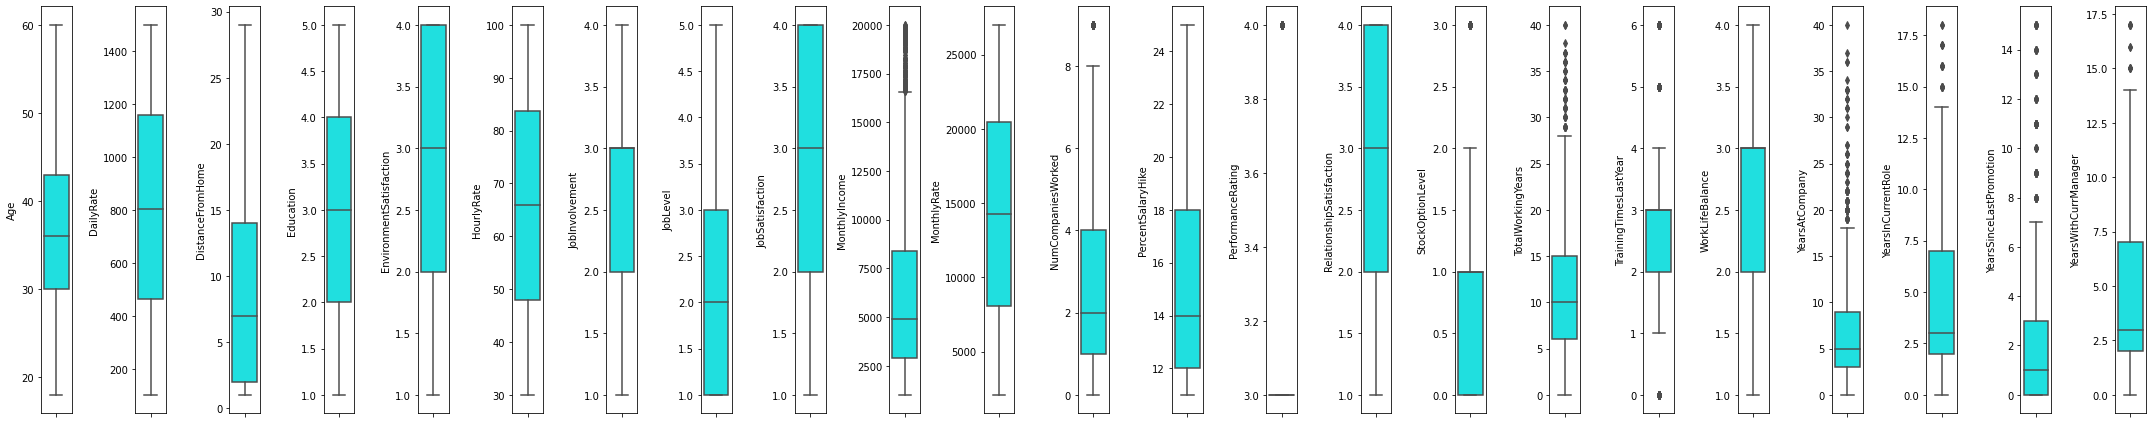

In [ ]:
#Boxplot untu deteksi outliers
plt.figure(figsize=(30,6))

#plotting
features = numericals_col
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_attrition[features[i]], color='cyan')
  plt.tight_layout()

* `PerformanceRating`data kategorik dengan nilai 3 dan 4 <br>
* `StockOptionLevel` data kategorik dengan nilai 0 hingga 3
* `TrainingTimesLastYear` data kategorik dengan nilai 0 hingga 6
* data yang terdapat outlier:
'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',  'YearsSinceLastPromotion', 'YearsWithCurrManager'

In [ ]:
# Exclude outliers using IQR
#MonthlyIncome
Q1 = df_attrition['MonthlyIncome'].quantile(0.25)
Q3 = df_attrition['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df_attrition[(df_attrition['MonthlyIncome'] >= lower_whisker) & (df_attrition['MonthlyIncome'] <= upper_whisker)]


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
outlier = df_attrition[(df_attrition['MonthlyIncome'] <= lower_whisker) | (df_attrition['MonthlyIncome'] >= upper_whisker)]
outlier

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,5,3,Other,3,Female,58,...,3,4,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,2,4,Marketing,2,Female,83,...,3,4,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,12,3,Technical Degree,2,Female,49,...,3,4,0,23,0,3,22,15,15,8
62,50,No,Travel_Rarely,989,7,2,Medical,2,Female,43,...,3,4,1,29,2,2,27,3,13,8
105,59,No,Non-Travel,1420,2,4,Human Resources,3,Female,32,...,4,4,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,21,3,Life Sciences,4,Female,72,...,3,3,1,29,2,2,1,0,0,0
1377,49,No,Travel_Frequently,1064,2,1,Life Sciences,2,Male,42,...,3,4,0,28,3,3,5,4,4,3
1401,55,No,Travel_Rarely,189,26,4,Human Resources,3,Male,71,...,3,1,1,35,0,3,10,9,1,4
1437,39,No,Non-Travel,105,9,3,Life Sciences,4,Male,87,...,3,3,0,21,3,2,6,0,1,3




---



In [ ]:
# Handling with IQR
Q1 = (df_attrition[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]).quantile(0.25)
Q3 = (df_attrition[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_attrition > maximum)
lower_than = (df_attrition < minimum)
df_attrition = df_attrition.mask(more_than, maximum, axis=1)
df_attrition = df_attrition.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_attrition[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
MonthlyIncome              16581.0
NumCompaniesWorked             8.5
TotalWorkingYears             28.5
YearsAtCompany                18.0
YearsInCurrentRole            14.5
YearsSinceLastPromotion        7.5
YearsWithCurrManager          14.5
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
MonthlyIncome             -5291.0
NumCompaniesWorked           -3.5
TotalWorkingYears            -7.5
YearsAtCompany               -6.0
YearsInCurrentRole           -5.5
YearsSinceLastPromotion      -4.5
YearsWithCurrManager         -5.5
dtype: float64

Persebaran data setelah ditangani Outlier: 
       MonthlyIncome  NumCompaniesWorked  TotalWorkingYears  YearsAtCompany  \
count    1470.000000         1470.000000        1470.000000     1470.000000   
mean     6361.891837            2.675510          11.103061        6.617687   
std      4353.345470            2.454656           7.303828        4.989788   
min      1009.000000   

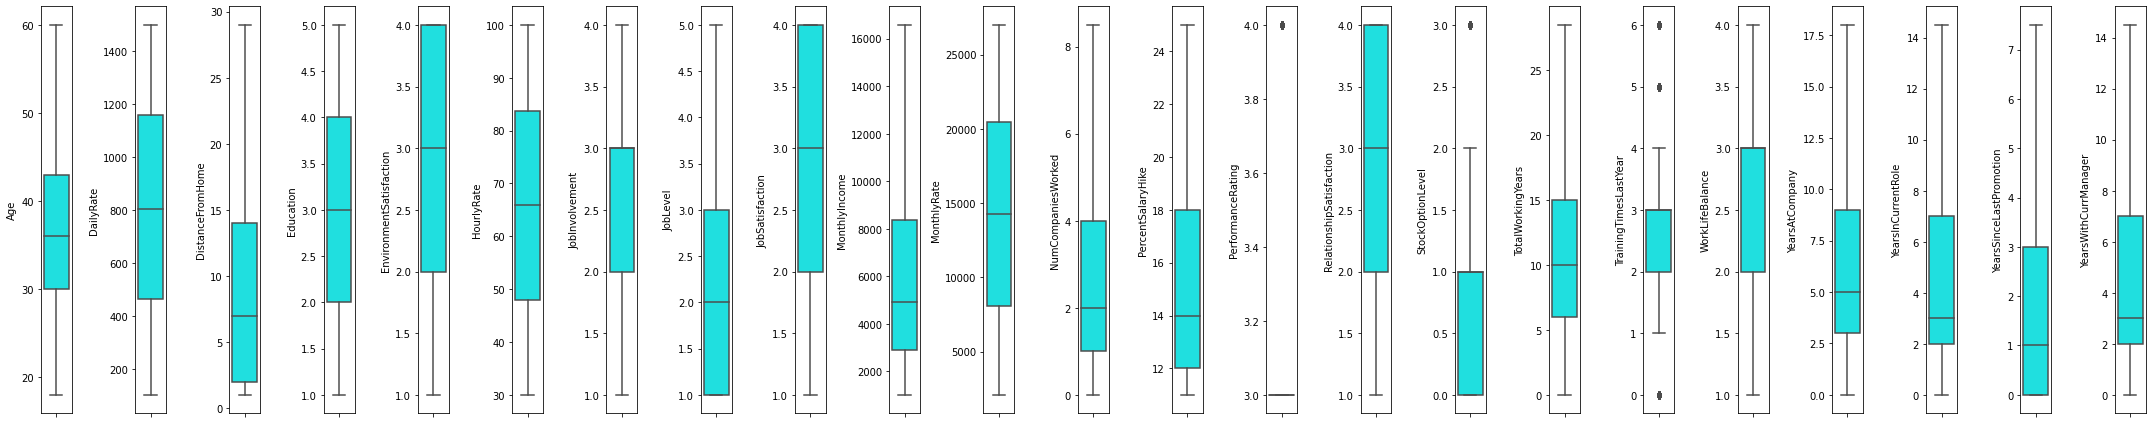

In [ ]:
#Boxplot untu deteksi outliers
plt.figure(figsize=(30,6))

#plotting
features = numericals_col
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_attrition[features[i]], color='cyan')
  plt.tight_layout()



---



### Multivariate analysis

## Deep dive questions <br>
○ Explore beyond the previous steps <br>
■ Is there any meaningful insights? <br>
○ List all of the questions <br>


1. Berapa % employee yang memilih untuk attrition?
2. Apa pengaruh `Yarsatcompany`, `Yearsincurrentrole`, `Yearssincepromotion` terhadap attrition?
3. `JobRole` apa yang paling banyak attrition?

83.87755155563354
16.122448444366455


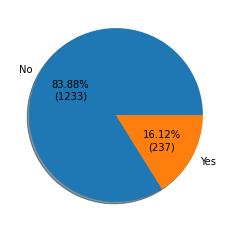

In [ ]:
def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df_attrition['Attrition'].value_counts()
total = len(df_attrition['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True);

sebanyak 16.12% atau 237 pegawai yang meninggalkan kantor

In [ ]:
'''
hue_colors = {"Yes": "black", "No": "red"}
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", hue_order=["Yes", "No"], palette=hue_colors)
plt.show()
'''

'\nhue_colors = {"Yes": "black", "No": "red"}\nsns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", hue_order=["Yes", "No"], palette=hue_colors)\nplt.show()\n'

In [ ]:
#ASLI
def plt_bar(i):
    hue_colors = {'Yes':'DarkRed', 'No':'DarkGreen'}
    plt.figure(figsize=(15,5))
    ax=sns.countplot(x=df_attrition[i], hue="Attrition", data=df_attrition,palette=hue_colors)
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
                        
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
def plt_bar_persen_seluruh(i):
    hue_colors = {'Yes':'DarkRed', 'No':'DarkGreen'}
    plt.figure(figsize=(15,5))
    ax=sns.countplot(x=df_attrition[i], hue="Attrition", data=df_attrition,palette=hue_colors)
    #ax=sns.countplot(x=df_attrition[i], data=df_attrition,palette='crest')
    total = len(df_attrition['Attrition'])

    # Iterrating over the bars one-by-one
    for bar in ax.patches:
      
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        #ax.annotate(format(bar.get_height(), '.0f'),
        #ax.annotate('{:.2f}%\n({:.0f})'.format(total*bar.get_x()/100, bar.get_height()),
        ax.annotate('{:.2f}%\n({:.0f})'.format(bar.get_height()/total*100, bar.get_height()),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def plt_bar_yes(i):
    plt.figure(figsize=(15,5))
    #ax=sns.countplot(x=df_attrition[i], hue="Attrition", data=df_attrition,palette='crest')
    ax=sns.countplot(x=df_attrition_yes[i], data=df_attrition_yes, color='darkred')

    # Iterrating over the bars one-by-one
    for bar in ax.patches:
      
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        ax.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')

    plt.xticks(rotation=45)
    plt.show()

    #6f3644 ---> NO
    #4b4a7a --->  YES

In [ ]:
def plt_bar_label_angka(i):
    hue_colors = {'Yes':'DarkRed', 'No':'DarkGreen'}
    plt.figure(figsize=(15,5))
    ax=sns.countplot(x=df_attrition[i], hue="Attrition", data=df_attrition,palette=hue_colors)
    #ax=sns.countplot(x=df_attrition[i], data=df_attrition,palette='crest')
    total = len(df_attrition['Attrition'])

    # Iterrating over the bars one-by-one
    for bar in ax.patches:
      
      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
        #ax.annotate(format(bar.get_height(), '.0f'),
        #ax.annotate('{:.2f}%\n({:.0f})'.format(total*bar.get_x()/100, bar.get_height()),
        ax.annotate('{:.0f}'.format(bar.get_height()),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

    plt.xticks(rotation=45)
    plt.show()

##Age analysis

In [ ]:
df_attrition_yes = df_attrition[df_attrition['Attrition'] == 'Yes']


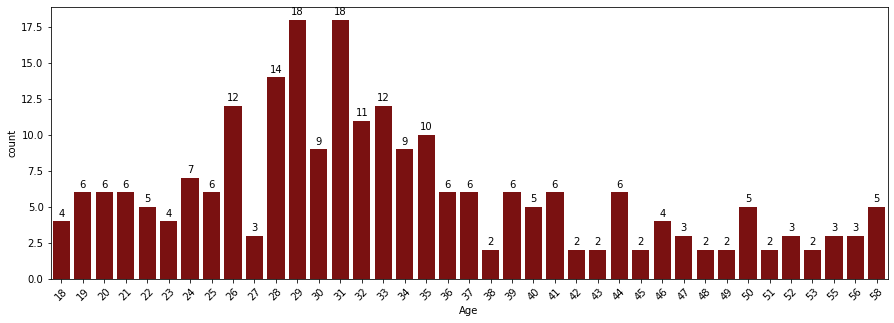

In [ ]:
plt_bar_yes('Age')

employee dengan usia 20an dan 30an lebih banyak resign. Apa penyebabnya? Apakah karena sering kerja lembur? 



<br><br>
karena usia pegawai beranekaragam, maka  akan dibagi kelompok usia 

In [ ]:
# membagi kelompok usia
def kelompok_usia(x):
  if x <20:
    return '<20'
  elif x>=20 and x<30:
    return '20'
  elif x>=30 and x<40:
    return '30'
  elif x>=40 and x<50:
    return '40'
  elif x>=50 and x<60:
    return '50'

df_attrition['KelompokUsia'] = df_attrition_yes['Age'].apply(kelompok_usia)

In [ ]:
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,KelompokUsia
0,41,Yes,Travel_Rarely,1102,1,2,Life Sciences,2,Female,94,...,1,0,8.0,0,1,6,4.0,0.0,5.0,40
1,49,No,Travel_Frequently,279,8,1,Life Sciences,3,Male,61,...,4,1,10.0,3,3,10,7.0,1.0,7.0,NaN
2,37,Yes,Travel_Rarely,1373,2,2,Other,4,Male,92,...,2,0,7.0,3,3,0,0.0,0.0,0.0,30
3,33,No,Travel_Frequently,1392,3,4,Life Sciences,4,Female,56,...,3,0,8.0,3,3,8,7.0,3.0,0.0,NaN
4,27,No,Travel_Rarely,591,2,1,Medical,1,Male,40,...,4,1,6.0,3,3,2,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,Medical,3,Male,41,...,3,1,17.0,3,3,5,2.0,0.0,3.0,NaN
1466,39,No,Travel_Rarely,613,6,1,Medical,4,Male,42,...,1,1,9.0,5,3,7,7.0,1.0,7.0,NaN
1467,27,No,Travel_Rarely,155,4,3,Life Sciences,2,Male,87,...,2,1,6.0,0,3,6,2.0,0.0,3.0,NaN
1468,49,No,Travel_Frequently,1023,2,3,Medical,4,Male,63,...,4,0,17.0,3,2,9,6.0,0.0,8.0,NaN


In [ ]:
df_attrition = df_attrition.sort_values(by=['Age'], ascending=True)


### Age vs Ovartime

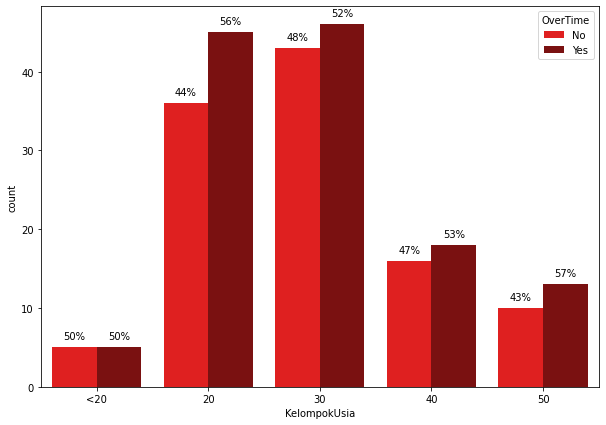

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.countplot( x='KelompokUsia', hue='OverTime', data=df_attrition, ax=ax, palette=['red','darkred'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l +1, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r +1, '{0:.0%}'.format(height_r/total), ha="center")
                    

plt.show()

bagi employee dengan kelompok usia antara 20 dan 30, kerja lembur merupakan salah satu faktor yang mempengaruhi mereka untuk resign

###Years at company vs Years since last promotion

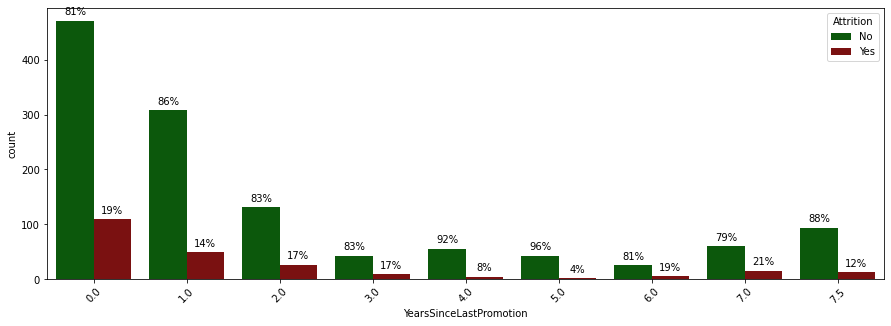

In [ ]:
plt_bar('YearsSinceLastPromotion')

posx and posy should be finite values
posx and posy should be finite values


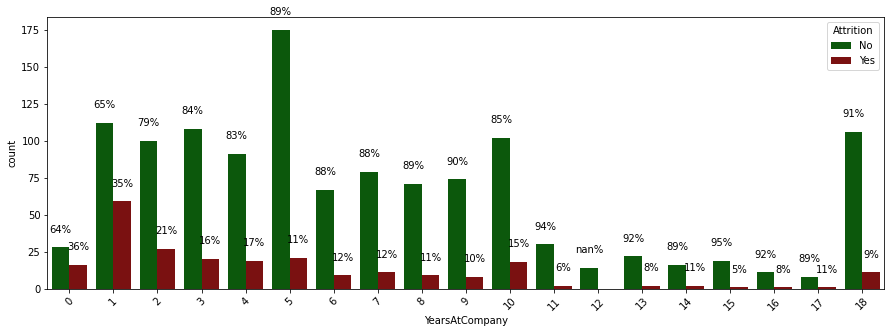

In [ ]:
plt_bar('YearsAtCompany')

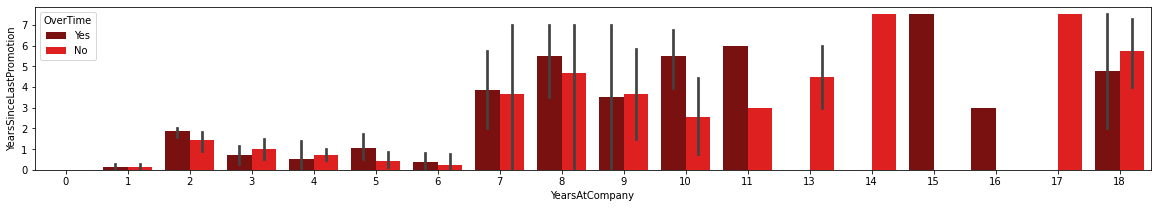

In [ ]:
#Attrition ='Yes', YearsAtCompany vs YearsSinceLastPromotion berdasarkan ovrtime
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(
    x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', hue='OverTime',
    data = df_attrition_yes, palette=['darkred','red']
)

Lama pegawai bekerja dalam perusahaan dan kerja lembur tidak mempengaruhi promosi jabatan

### JobLevel vs MonthlyIncome

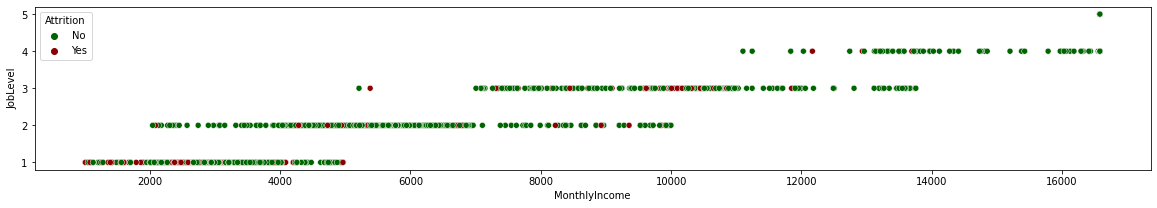

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
#plt.scatter(y='JobLevel', x='MonthlyIncome', 
#                data=df_attrition, hue="Attrition" )

sns.scatterplot(y='JobLevel', x='MonthlyIncome', hue='Attrition', 
                data=df_attrition, palette=['darkgreen', 'darkred'])

pegawai dengan job level dan gaji rendah cenderung untuk resign 

In [ ]:
df_attrition['JobRole']

1311           Research Scientist
457          Sales Representative
972         Laboratory Technician
301          Sales Representative
296         Laboratory Technician
                  ...            
536               Sales Executive
427               Sales Executive
411                       Manager
879               Sales Executive
1209    Healthcare Representative
Name: JobRole, Length: 1470, dtype: object

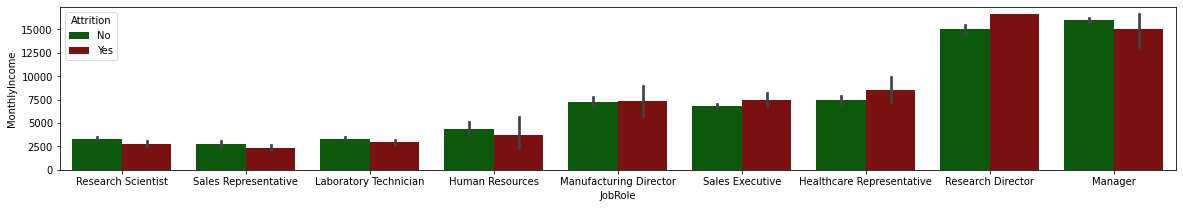

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
#plt.scatter(y='JobLevel', x='MonthlyIncome', 
#                data=df_attrition, hue="Attrition" )

sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', 
                data=df_attrition, palette=['darkgreen', 'darkred'])

### Distance

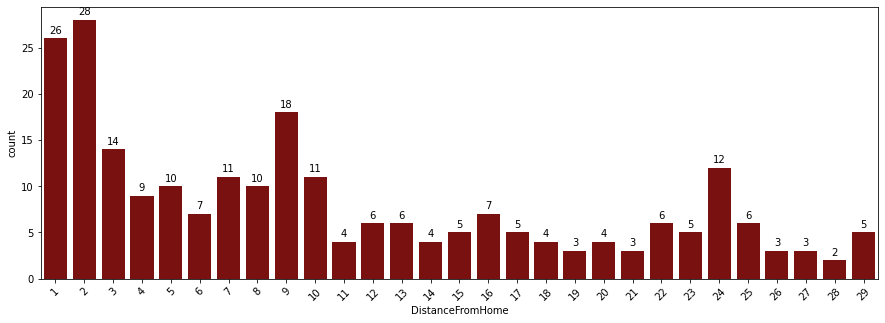

In [ ]:
plt_bar_yes('DistanceFromHome')

Ternyata pegawai dengan jarak ke kantor lebih dekat yang berpotensi untuk resign, mengapa itu terjadi? Apakah yang memiliki jarak rumah terdekat adalah pegawai kelompok usia 20 dan 30?

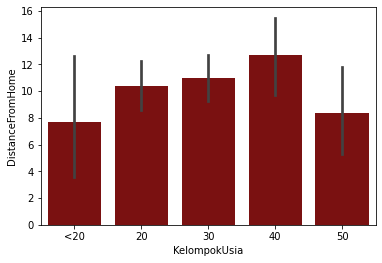

In [ ]:
sns.barplot(y='DistanceFromHome', x='KelompokUsia', data=df_attrition, color='DarkRed')

jika dilihat dari jarak rumah, pegawai resign terbanyak dari kelompok usia 40an 

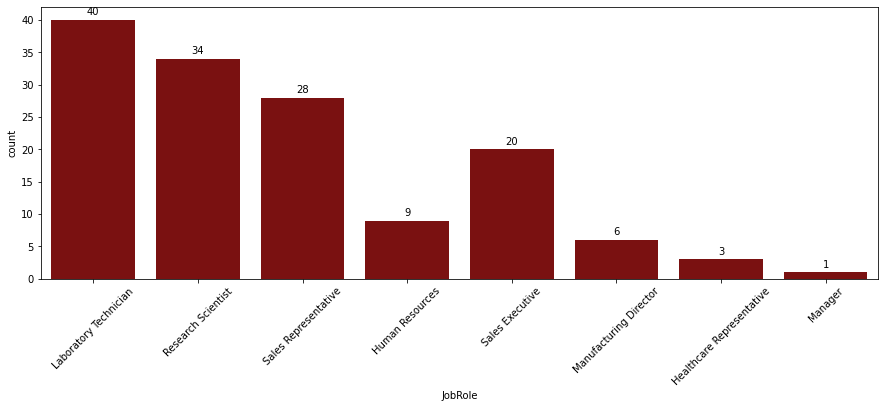

In [ ]:
baru_pindah = df_attrition_yes['JobRole'][(df_attrition_yes['YearsInCurrentRole']==0)|(df_attrition_yes['YearsInCurrentRole']==2)]

plt.figure(figsize=(15,5))
ax=sns.countplot(x=baru_pindah, data=df_attrition_yes, color='darkred')

# Iterrating over the bars one-by-one
for bar in ax.patches:
  
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


### Years at current role (tahun diposisi saat ini) + JobRole

posx and posy should be finite values
posx and posy should be finite values


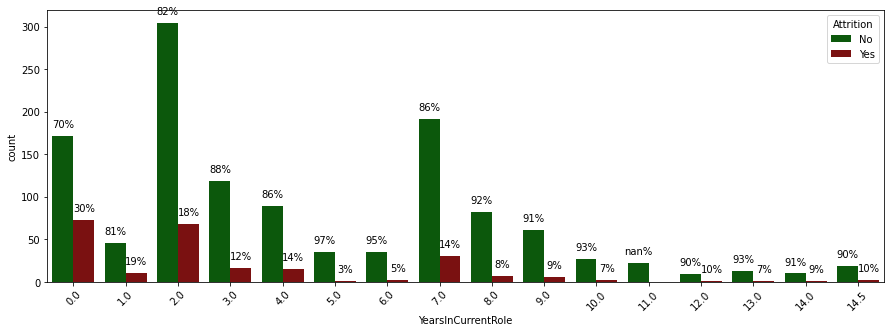

In [ ]:
plt_bar('YearsInCurrentRole')

Pegawai yang resign kebanyakan dari pegawai dengan posisi baru (beberpa bulan dan 2 tahun) diposisi tersebut. Berasal dari departement apakah pegawai tersebut?  

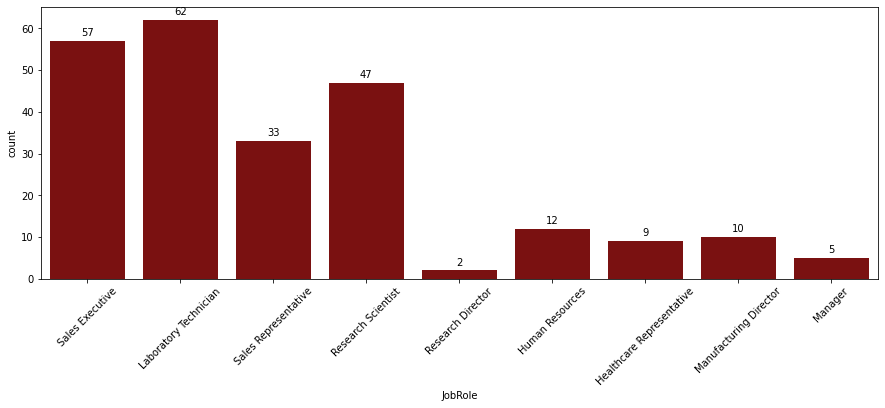

In [ ]:
#JobRole vs Attrition="Yes"
plt_bar_yes('JobRole')

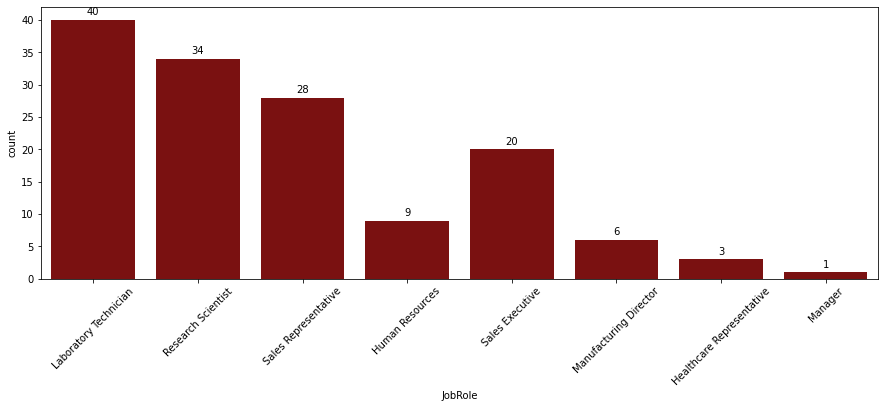

In [ ]:
baru_pindah = df_attrition_yes['JobRole'][(df_attrition_yes['YearsInCurrentRole']==0)|(df_attrition_yes['YearsInCurrentRole']==2)]

plt.figure(figsize=(15,5))
ax=sns.countplot(x=baru_pindah, data=df_attrition_yes, color='darkred')

# Iterrating over the bars one-by-one
for bar in ax.patches:
  
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


Pegawai resign terbanyak dari Laboratory Technician. Dari 62 pegawai Laboratory Technician yang resign, sebanyak 40 pegawai resign pada tahun kedua dan kurang dari 1 tahun.

###Education

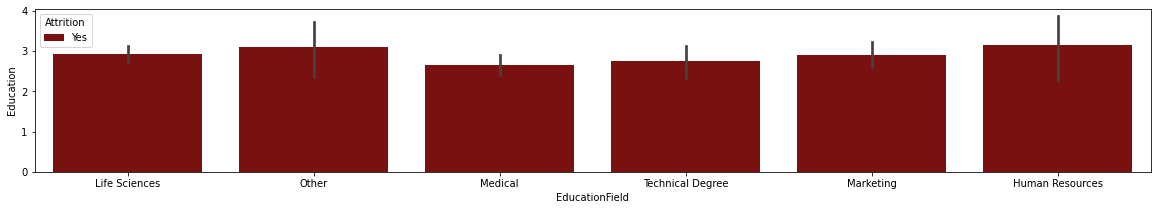

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
#plt.scatter(y='JobLevel', x='MonthlyIncome', 
#                data=df_attrition, hue="Attrition" )

sns.barplot(y='Education', x='EducationField', hue='Attrition', 
                data=df_attrition_yes, palette=[ 'darkred'])



---



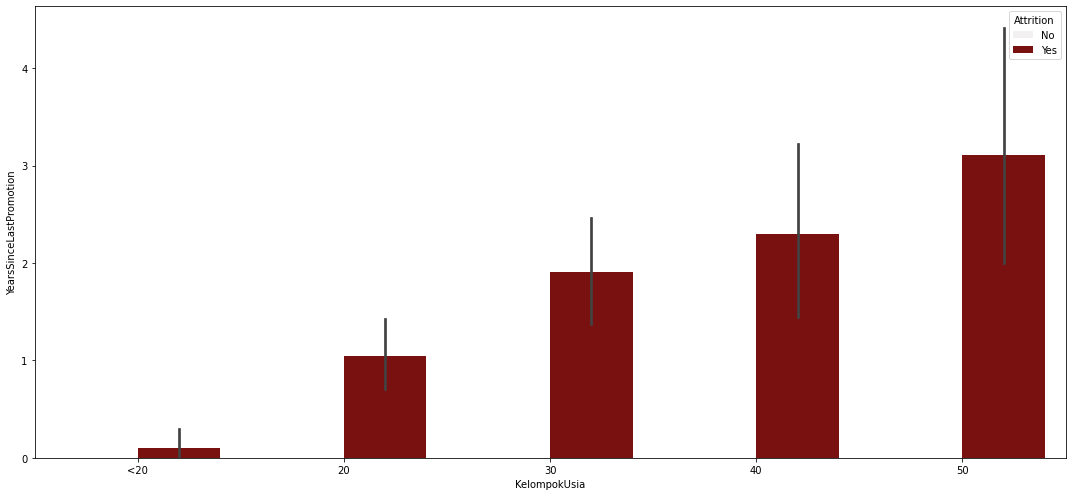

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=df_attrition, y='YearsSinceLastPromotion', x='KelompokUsia', color='darkred', hue='Attrition')
plt.tight_layout()

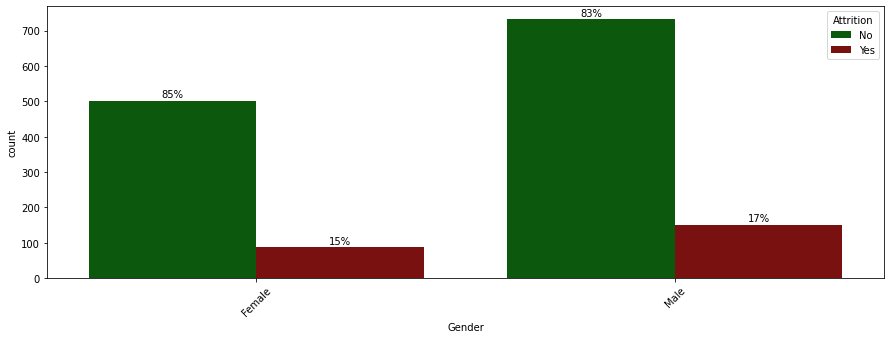

In [ ]:
plt_bar('Gender')

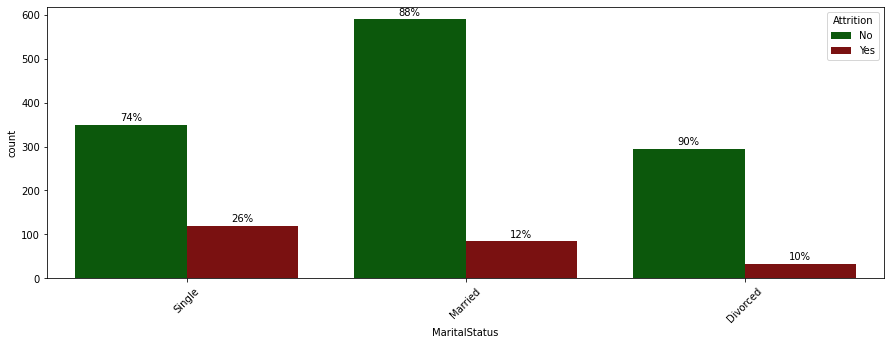

In [ ]:
plt_bar('MaritalStatus')

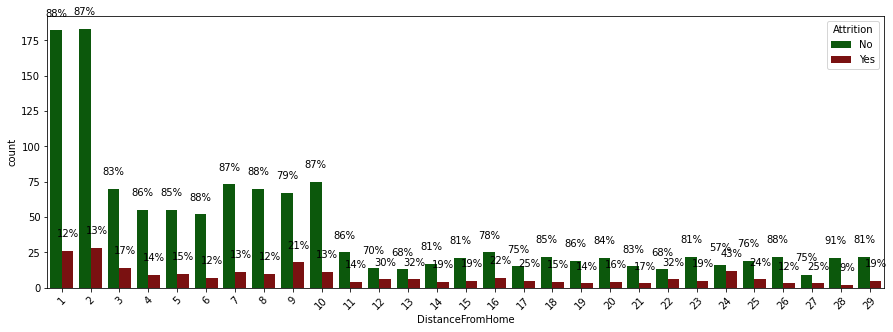

In [ ]:
plt_bar('DistanceFromHome')

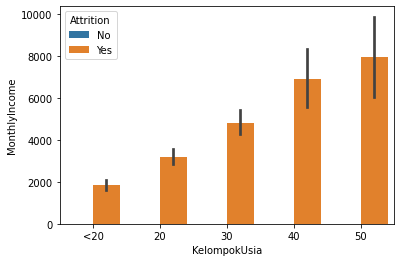

In [ ]:
#fig, ax = plt.subplot(figsize=(12,10))
sns.barplot(y='MonthlyIncome', x='KelompokUsia', hue='Attrition', data=df_attrition)


In [ ]:
df_attrition['EnvironmentSatisfaction']

1311    2
457     2
972     4
301     4
296     3
       ..
536     1
427     3
411     1
879     2
1209    3
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64

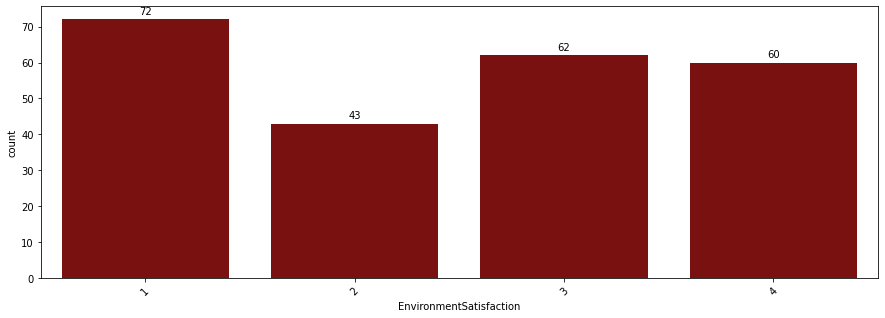

In [ ]:
plt_bar_yes('EnvironmentSatisfaction')

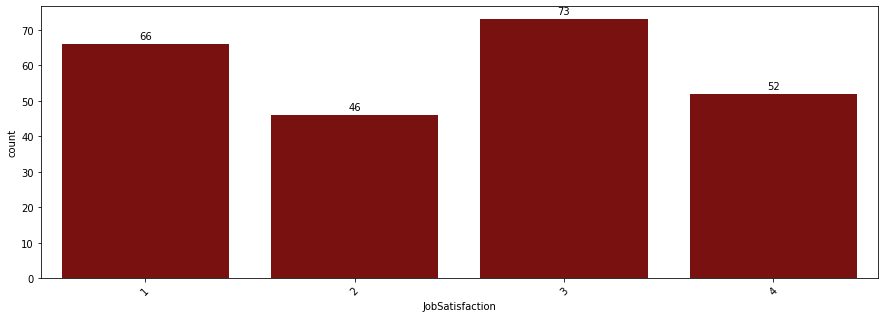

In [ ]:
plt_bar_yes('JobSatisfaction')


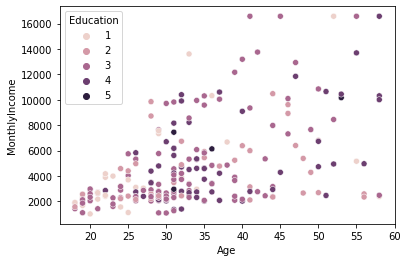

In [ ]:
sns.scatterplot(y='MonthlyIncome', x='Age', hue='Education', data=df_attrition_yes)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

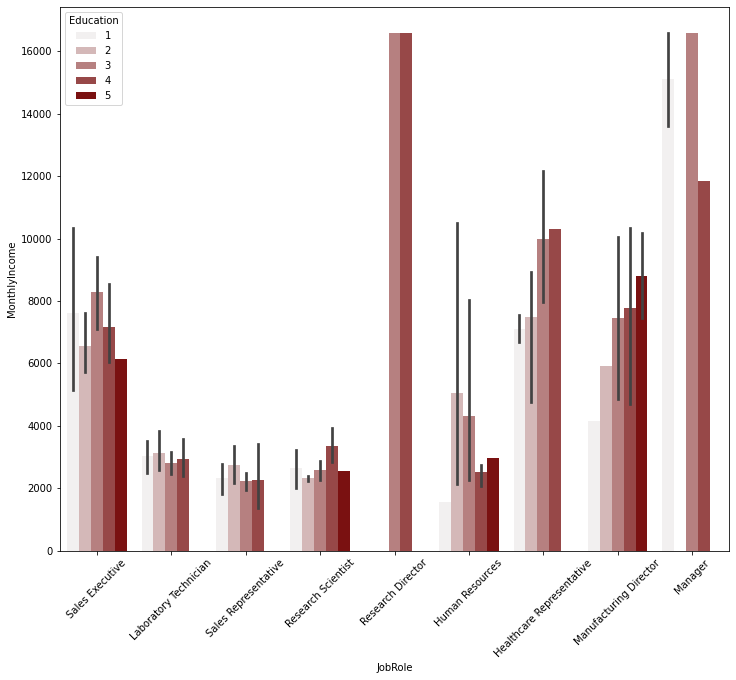

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y='MonthlyIncome', x='JobRole', hue='Education', data=df_attrition_yes, color='darkred')
plt.xticks(rotation=45)

#Transformasi

In [ ]:
for i in df_attrition:
  print('nilai unique dari', "'''", i, "'''", 'adalah', df_attrition[i].unique(), 'sebanyak', df_attrition[i].nunique())
  print('------'*20)


nilai unique dari ''' Age ''' adalah [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60] sebanyak 43
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' Attrition ''' adalah ['No' 'Yes'] sebanyak 2
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' BusinessTravel ''' adalah ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] sebanyak 3
------------------------------------------------------------------------------------------------------------------------
nilai unique dari ''' DailyRate ''' adalah [1431 1306 1124  812  230  544  287  247  265  489  419  528  602  303
  504 1181  645  129  654  500  769  805  959 1362 1141  727  871 1097
  984  156  337 1343 1334  756  996  391  501  251 1427  895  546  457
 1136 1256  534 1294  5

Kolom-kolom yang ingin ditransformasikan:
1. `OverTime`, `Attrition` Jika 'No' maka 0, jika 'Yes' maka 1
2. `Gender` Jika 'Male' maka 0, jika 'Female' maka 1
3. `BusinessTravel`, `MaritalStatus`, `JobRole`, `EducationField`

In [ ]:
### Encoding OverTime and our target variable (Attrition)
yes_no_dict = {
    'Yes':1,
    'No':0
}

for colname in ['OverTime', 'Attrition']:
    df_attrition[colname] = df_attrition[colname].map(yes_no_dict)

In [ ]:
dummy = pd.DataFrame()
gender_dict = {
    'Male':0,
    'Female':1
}
#%time dummy['Gender'] = df_attrition['Gender'].map(gender_dict) #map: dipetakkan
df_attrition['Gender'] = df_attrition['Gender'].map(gender_dict)
df_attrition['Gender']

1311    1
457     0
972     1
301     1
296     0
       ..
536     0
427     1
411     1
879     0
1209    0
Name: Gender, Length: 1470, dtype: int64

In [ ]:
df_attrition['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
business_dict = {
    'Travel_Rarely':2,
    'Travel_Frequently':1,
    'Non-Travel':0
}
df_attrition['BusinessTravel'] = df_attrition['BusinessTravel'].map(business_dict)
df_attrition['BusinessTravel']

1311    0
457     1
972     0
301     2
296     2
       ..
536     2
427     1
411     2
879     2
1209    2
Name: BusinessTravel, Length: 1470, dtype: int64

In [ ]:
df_attrition['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
status_dict = {
    'Married':2, 
    'Single':1, 
    'Divorced':0
}
df_attrition['MaritalStatus'] = df_attrition['MaritalStatus'].map(status_dict)
df_attrition['MaritalStatus'].value_counts()

2    673
1    470
0    327
Name: MaritalStatus, dtype: int64

In [ ]:
df_attrition['MaritalStatus']

1311    1
457     1
972     1
301     1
296     1
       ..
536     1
427     2
411     2
879     0
1209    0
Name: MaritalStatus, Length: 1470, dtype: int64

In [ ]:
df_attrition['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
cat_cols = ['JobRole','EducationField']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(df_attrition[col].value_counts().index,0)}
    df_attrition[col] = df_attrition[col].map(map_dict)

In [ ]:
'''
#Onehot Encoding
onehot_columns = ['JobRole', 'EducationField']
df_attrition=pd.get_dummies(df_attrition, columns = onehot_columns)
'''

"\n#Onehot Encoding\nonehot_columns = ['JobRole', 'EducationField']\ndf_attrition=pd.get_dummies(df_attrition, columns = onehot_columns)\n"

In [ ]:
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,KelompokUsia
1311,18,0,0,1431,14,3,1,2,1,33,...,3,0,0.0,4,1,0,0.0,0.0,0.0,NaN
457,18,1,1,1306,5,3,2,2,0,69,...,4,0,0.0,3,3,0,0.0,0.0,0.0,<20
972,18,0,0,1124,1,3,0,4,1,97,...,3,0,0.0,5,4,0,0.0,0.0,0.0,NaN
301,18,0,2,812,10,3,1,4,1,69,...,1,0,0.0,2,3,0,0.0,0.0,0.0,NaN
296,18,1,2,230,3,3,0,3,0,54,...,3,0,0.0,2,3,0,0.0,0.0,0.0,<20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,60,0,2,1179,16,4,2,1,0,84,...,4,0,10.0,1,3,2,2.0,2.0,2.0,NaN
427,60,0,1,1499,28,3,2,3,1,80,...,4,0,22.0,5,4,18,13.0,7.5,11.0,NaN
411,60,0,2,422,7,3,0,1,1,41,...,4,0,28.5,5,1,18,8.0,7.5,10.0,NaN
879,60,0,2,696,7,4,2,2,0,52,...,2,1,12.0,3,3,11,7.0,1.0,9.0,NaN


In [ ]:
df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1311 to 1209
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   int64  
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   int64  
 13  JobSatisfaction           1470 non-null   int64  
 14  Marit

In [ ]:
#sebelum masuk pemodelan, drop kelompok usia
df_attrition=df_attrition.drop(columns='KelompokUsia')

In [ ]:
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1311,18,0,0,1431,14,3,1,2,1,33,...,3,3,0,0.0,4,1,0,0.0,0.0,0.0
457,18,1,1,1306,5,3,2,2,0,69,...,3,4,0,0.0,3,3,0,0.0,0.0,0.0
972,18,0,0,1124,1,3,0,4,1,97,...,3,3,0,0.0,5,4,0,0.0,0.0,0.0
301,18,0,2,812,10,3,1,4,1,69,...,3,1,0,0.0,2,3,0,0.0,0.0,0.0
296,18,1,2,230,3,3,0,3,0,54,...,3,3,0,0.0,2,3,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,60,0,2,1179,16,4,2,1,0,84,...,3,4,0,10.0,1,3,2,2.0,2.0,2.0
427,60,0,1,1499,28,3,2,3,1,80,...,3,4,0,22.0,5,4,18,13.0,7.5,11.0
411,60,0,2,422,7,3,0,1,1,41,...,3,4,0,28.5,5,1,18,8.0,7.5,10.0
879,60,0,2,696,7,4,2,2,0,52,...,3,2,1,12.0,3,3,11,7.0,1.0,9.0


In [ ]:
df_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Model

EMPLOYEE ATTRITION <br>
Tujuan: mendeteksi pegawai yang mungkin akan resign sehingga tindakan tersebut dapat diambil untuk mempertahankan pegawai <br><br>
Nilai positif: pegawai akan resign <br>
FP: pegawai sebenarnya tidak akan resign tapi diprediksi akan resign <br>
FN: pegawai yang sebenarnya akan resign tapi diprediksi akan resign<br><br>

karena FN lebih buruk, maka diutamakan RECALL

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df_attrition, 
                                     test_size = 0.25, random_state = 42)
print("training shape: ",df_train.shape)
print("testing shape: ",df_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [ ]:
X_train_data = df_train.loc[:, df_train.columns!='Attrition']
y_train_data = df_train.loc[:, df_train.columns=='Attrition']

X_test_data = df_test.loc[:, df_test.columns!='Attrition']
y_test_data = df_test.loc[:, df_test.columns=='Attrition']

In [ ]:
print(y_test_data.shape)

(368, 1)


##Dealing with Imbalanced Data

## Undersampling

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Attrition']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['Attrition']))

Counter({0: 920, 1: 182})
Counter({0: 182, 1: 182})


##Oversampling

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['Attrition']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['Attrition']))

Counter({0: 920, 1: 182})
Counter({0: 920, 1: 920})


##Evaluation Function

In [ ]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    
    # pred = clf.predict(X_test_data)
    # print(clf.__class__.__name__, " ", accuracy_score(y_test_data,pred))
    
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

## Logistic Regression

In [ ]:
#logreg
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)
evaluate(logreg)

Accuracy: 0.5815217391304348
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.56      0.69       313
           1       0.22      0.73      0.34        55

    accuracy                           0.58       368
   macro avg       0.57      0.64      0.52       368
weighted avg       0.82      0.58      0.64       368

------
Assuming 1 as positive, we get:

True Positive: 40
True Negative: 174
False Positive: 139
False Negative: 15

Precision: 0.22346368715083798
Recall: 0.7272727272727273
F1-Score: 0.3418803418803419


In [ ]:
#logreg undersampling
logreg_under_model = LogisticRegression(random_state = 1, n_jobs = -1)
logreg_under_model.fit(X_train_under, y_train_under)
evaluate(logreg_under_model, X_test_data, y_test_data)

Accuracy: 0.5760869565217391
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.55      0.69       313
           1       0.22      0.75      0.34        55

    accuracy                           0.58       368
   macro avg       0.57      0.65      0.52       368
weighted avg       0.82      0.58      0.64       368

------
Assuming 1 as positive, we get:

True Positive: 41
True Negative: 171
False Positive: 142
False Negative: 14

Precision: 0.22404371584699453
Recall: 0.7454545454545455
F1-Score: 0.3445378151260504


In [ ]:
#logreg oversampling
logreg_over_model = LogisticRegression(random_state = 1, n_jobs = -1)
logreg_over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(logreg_over_model, X_test_data, y_test_data)

Accuracy: 0.6277173913043478
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       313
           1       0.23      0.65      0.34        55

    accuracy                           0.63       368
   macro avg       0.57      0.64      0.54       368
weighted avg       0.81      0.63      0.68       368

------
Assuming 1 as positive, we get:

True Positive: 36
True Negative: 195
False Positive: 118
False Negative: 19

Precision: 0.23376623376623376
Recall: 0.6545454545454545
F1-Score: 0.34449760765550236


## Decision Tree

In [ ]:
#dt
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.6277173913043478
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       313
           1       0.22      0.60      0.33        55

    accuracy                           0.63       368
   macro avg       0.56      0.62      0.53       368
weighted avg       0.80      0.63      0.68       368

------
Assuming 1 as positive, we get:

True Positive: 33
True Negative: 198
False Positive: 115
False Negative: 22

Precision: 0.22297297297297297
Recall: 0.6
F1-Score: 0.3251231527093596


In [ ]:
#df undersampling
dt_under_model = DecisionTreeClassifier(random_state = 1)
dt_under_model.fit(X_train_under, y_train_under)
evaluate(dt_under_model, X_test_data, y_test_data)

Accuracy: 0.625
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       313
           1       0.23      0.64      0.34        55

    accuracy                           0.62       368
   macro avg       0.57      0.63      0.54       368
weighted avg       0.81      0.62      0.68       368

------
Assuming 1 as positive, we get:

True Positive: 35
True Negative: 195
False Positive: 118
False Negative: 20

Precision: 0.22875816993464052
Recall: 0.6363636363636364
F1-Score: 0.33653846153846156


In [ ]:
#df oversampling
dt_over_model = DecisionTreeClassifier(random_state = 1)
dt_over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(dt_over_model, X_test_data, y_test_data)

Accuracy: 0.7336956521739131
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       313
           1       0.28      0.49      0.36        55

    accuracy                           0.73       368
   macro avg       0.59      0.63      0.59       368
weighted avg       0.80      0.73      0.76       368

------
Assuming 1 as positive, we get:

True Positive: 27
True Negative: 243
False Positive: 70
False Negative: 28

Precision: 0.27835051546391754
Recall: 0.4909090909090909
F1-Score: 0.35526315789473684


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#rf
rf = RandomForestClassifier(random_state = 1, n_jobs = -1)
rf.fit(X_train_data, y_train_data)
evaluate(rf)

Accuracy: 0.8614130434782609
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       313
           1       0.75      0.11      0.19        55

    accuracy                           0.86       368
   macro avg       0.81      0.55      0.56       368
weighted avg       0.85      0.86      0.81       368

------
Assuming 1 as positive, we get:

True Positive: 6
True Negative: 311
False Positive: 2
False Negative: 49

Precision: 0.75
Recall: 0.10909090909090909
F1-Score: 0.19047619047619047


In [ ]:
rf_under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
rf_under_model.fit(x_train_under, y_train_under)
evaluate(rf_under_model, X_test_data, y_test_data)

Accuracy: 0.720108695652174
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       313
           1       0.30      0.65      0.41        55

    accuracy                           0.72       368
   macro avg       0.61      0.69      0.61       368
weighted avg       0.83      0.72      0.76       368

------
Assuming 1 as positive, we get:

True Positive: 36
True Negative: 229
False Positive: 84
False Negative: 19

Precision: 0.3
Recall: 0.6545454545454545
F1-Score: 0.41142857142857137


In [ ]:
rf_over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
rf_over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(rf_over_model, X_test_data, y_test_data)

Accuracy: 0.8722826086956522
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       313
           1       0.61      0.42      0.49        55

    accuracy                           0.87       368
   macro avg       0.75      0.69      0.71       368
weighted avg       0.86      0.87      0.86       368

------
Assuming 1 as positive, we get:

True Positive: 23
True Negative: 298
False Positive: 15
False Negative: 32

Precision: 0.6052631578947368
Recall: 0.41818181818181815
F1-Score: 0.49462365591397855


#Kesimpulan

pilih model random forest dengan undersampling yang mempunyai akurasi 0,72 dan recall 0.65

Faktor-faktor yang mempengarugi:
* employee dengan usia 20an dan 30an lebih banyak resign
* bagi employee dengan kelompok usia antara 20 dan 30, kerja lembur merupakan salah satu faktor yang mempengaruhi mereka untuk resign
* Lama pegawai bekerja dalam perusahaan dan kerja lembur tidak mempengaruhi promosi jabatan
* pegawai dengan job level dan gaji rendah cenderung untuk resign 
* Pegawai yang resign kebanyakan dari pegawai dengan posisi baru (beberpa bulan dan 2 tahun) diposisi tersebut.
* Pegawai resign terbanyak dari departement Research & Development. Dari 133 pegawai departement Research & Development yang resign, sebanyak 48 pegawai resign pada tahun kedua dan kurang dari 1 tahun.
* jika dilihat dari jarak rumah, pegawai resign terbanyak dari kelompok usia 40an 
